This is a Jupyter Notebook: To edit and run any of the code, either:  
1) Run it remotely from any Jupyter server.  
2) Clone or download it and open it up locally. You will need to install Anaconda 3.x to get Jupyter and all packages that are used in the notebook.

# Microservice: Statistics for Historical Job Postings in Platsbanken

Version: 0.1  
Date: 2017-04-24  
Author(s): Simon Benjaminsson
  
<a href='#section1'>Description</a>  
<a href='#section2'>API calls</a>  
<a href='#section3'>Syntax</a>  
<a href='#section4'>Example 1 - Specific job types</a>  
<a href='#section5'>Example 2 - Employers</a>  
<a href='#section6'>Example 3 (advanced) - Effect of the privatization of pharmacies</a>

## Description <a id='section1'></a>

The Statistics for Historical Job Postings API is a microservice providing aggregated results of basic types of queries over <a href="http://jobtechdev.se/products/historical-job-postings">the historical dataset of Platsbanken</a>. The intention is to:  
- Get fast access to basic calculations on the full dataset without crunching any data.  
- Easily be able to use the statistics in applications.  
  
A full example (javascript + d3) using this API can be found <a href="http://historik.azurewebsites.net">here</a>.  
  
This API is not intended for production use. If that is needed, clone the <a href="http://github.com/simonbe/afhistorik">source</a> and setup a separate instance.


## API calls <a id='section2'></a>

The microservice is a REST API endpoint currently located at:  
<a href="x">http://13.74.12.222:8080/realtime1/</a>  


To access it, use it together with an arbitrary query.  
  
In the browser: http://13.74.12.222:8080/realtime1/javascript  

In javascript (jQuery):  
$.getJSON("http://13.74.12.222:8080/realtime1/javascript",function(data) { })

In Python:

In [22]:
import requests
import json

url = 'http://13.74.12.222:8080/realtime1/'
query = 'javascript'
response = requests.get(url + query)
result = json.loads(response.content)

The API returns the following:

In [23]:
result[query].keys()

[u'kommunkoder',
 u'occupations',
 u'months',
 u'kommunkoder_percapita',
 u'kommunkoder_total',
 u'employers',
 u'years']

And a retrieval time in seconds:

In [24]:
result['retrieval_time']

0.162885

Each object contains a dictionary with labels in one list and corresponding values in the other.

In [25]:
data = result[query]['months']
data.keys()

[u'Counts', u'Month']

These contains labels ('Month') and corresponding values ('Counts'):

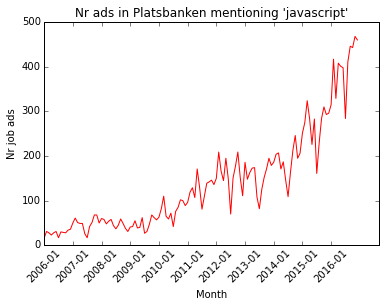

In [26]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plotData(data,title):
    x = range(0,len(data['Counts']))
    y = data['Counts']
    xTicks = data['Month']
    
    x1=[i for i in range(0,len(xTicks),12)]
    x2=[xTicks[i] for i in range(0,len(xTicks),12)]
    
    plt.plot(x, y, 'r')
    plt.xticks(x1, x2, rotation=45)
    plt.ylabel('Nr job ads')
    plt.xlabel('Month')
    plt.title(title)
    plt.show()
    
plotData(data,"Nr ads in Platsbanken mentioning 'javascript'")

As seen from the plot or calculated straight from the retrieved data, the number of ads mentioning 'javascript' was increased between december 2006 and december 2016 by

In [6]:
c=data['Counts'][data['Month'].index('2016-12')] / data['Counts'][data['Month'].index('2006-12')]
print(str(int(round(c*100)))+'%')

1278%


To get several results at once separate each query by a decimal:

In [7]:
queries = 'python,c++,assembler,_total'

response = requests.get(url + queries)
result = json.loads(response.content)
result.keys()

[u'python', u'_total', u'assembler', u'retrieval_time', u'c++']

where <b>'_total'</b> is a special keyword giving statistics for the full dataset:

In [11]:
sum(result['_total']['years']['Counts'])

KeyError: 'years'

### Syntax<a id='section3'></a>

A query to the API has a syntax for AND, OR and NOT combinations:  
1. <b>'javascript angular'</b> gives result for only those ads mentioning javascript <b>AND</b> angular.
2. <b>'(javascript java) angular'</b> gives result for those ads mentioning (javascript <b>OR</b> java) <b>AND</b> angular.
3. <b>'javascript !angular'</b> gives result for those ads mentioning javascript but <b>NOT</b> angular.  
  
  
Combining these operations one can formulate complex queries:

<b>'Give me statistics on all ads mentioning javascript in 2011, 2012 and 2013 in the Stockholm municipality but not mentioning html'</b>  
would be  
<b>'javascript !html (2011 2012 2013) Stockholm'</b>

Meta data information has been indexed separately and a specific job type or a specific employer can be called by "job type name" (case sensitive).  
  
  
Specific employer a specific year: <b>2012 "Arbetsförmedlingen"</b>  
  
Specific job type in a municipality: <b>"Lärare gymnasiet" Malmö</b>

### Example 1 - Specific job types<a id='section4'></a>

Get statistics on all ads which has had the metadata 'Lärare gymnasiet'

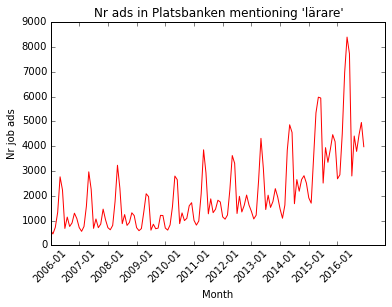

In [27]:
query = u'lärare' # case-sensitive
response = requests.get(url + query)
result = json.loads(response.content)
data = result[query]['months']
plotData(data,u"Nr ads in Platsbanken mentioning 'lärare'")

See the distribution across the municipalities of Sweden:

Let's do a simple estimation by a regression on how it will look in the future:

### Example 2 - Employers<a id='section5'></a>

Note: Employers post under a name they chose themselves and may change their name.  
  
Get statistics on all ads from Arbetsförmedlingen:

In [1]:
query = '"Arbetsförmedlingen"'
result = json.loads()

NameError: name 'json' is not defined

Let's estimate how we think Arbetsförmedlingen will recruit in 2017:  
  
Do a regression on the data supplied from the API, one for each occupation:

Split it up into the different occupations.

### Example 3 (Advanced) - Effect of the privatization of pharmacies<a id='section6'></a>

Under construction.